#Laboratório de hands-on em OCR com Visão Computacional

Este notebook visa apresentar algumas estratégias de reconhecimento de caracters óticos (OCR) agregando engines existentes como o [Tesseract](https://github.com/tesseract-ocr/tesseract) como também abordagens por cloud pública utilizando o [Azure](https://azure.microsoft.com/pt-br/).

Não somente aplicar o OCR, é comum pré-processarmos as imagens antes para obter um melhor resultado no reconhecimento. 

Situações como imagem com ruídos, baixa iluminação ou até mesmo algum deslocamento durante a fase de aquisição podem comprometer o reconhecimento adequado.

Por isso também será abordado algumas técnicas, utilizando o OpenCV de modo melhorar a imagem previamente adquirida e acompanhar e comparar os seus resula

## 1. Instalação dos componentes



### Instalação do Google Tesseract

O Tesseract é um aplicativo que executa em nível de sistema operacional. Possui suporte para Linux e Windows.

O ambiente do Google Colab é Linux, portanto vamos utilizar esta versão.

> O ambiente do Google Colab é volátil. Se vc sair deste notebook e entrar novamente, precisará reinstalar de novo tanto a aplicação no sistema operacional quanto a biblioteca em Python.

In [3]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,465 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

### Instalando o idioma português do Tesseract

In [4]:
!sudo apt install tesseract-ocr-por

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-por all 4.00~git24-0e00fe6-1.2 [856 kB]
Fetched 856 kB in 1s (918 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-por.
(Reading database

### Instalação da biblioteca PyTesseract

O Tesseract é um aplicativo que executa em nível de sistema operacional. Possui suporte para Linux e Windows.

O ambiente do Google Colab é Linux, portanto vamos utilizar esta versão.

> O ambiente do Google Colab é volátil. Se vc sair deste notebook e entrar novamente, precisará reinstalar de novo tanto a aplicação no sistema operacional quanto a biblioteca em Python.

Além disso vamos precisar da [biblioteca](https://pypi.org/project/pytesseract/) em Python que encapsula o Tesseract do sistema .

Note que o Google Colab possui diversas bibliotecas já pré-instaladas como o OpenCV, porém o Tesseract ainda não.

In [5]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=f46f4928402277b4d9747a6ee004213315406e47850769a44be5cddb77ece14c
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


## Introdução sobre processamento de imagens

As demais biblioteca que iremos utilizar nesta parte já estáo prontas no ambiente do Colab, dentre eles o OpenCV a qual é referenciado pelo nome "cv2", mesmo estando na versão 4 (última) 😛.

In [6]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np

Antes de partirmos para a análise dos cupons fiscais, vamos entnder como funciona carregar e analisar as imagens e prepará-las para o reconhecimento por OCR.

As imagens podem ser carregadas no formato matricial utilizando o OpenCV. Existem outras bibliotecas que podem fazer a mesma coisa como PIL, ScikitImage, etc., embora o OpenCV seja o mais utilizado e popular, por isso vamos utilizar ele por conta de outras funcionalidades que iremos analisar a seguir.

Por padrão, as imagens quando carregadas inicialmente pelo OpenCV são representadas (as coloridas) em BGR, pela união das cores _blue_ (B), _gren_ (G) e _red_ (R). Devido a isso nossa primeira tarefa é converter no formato RGB pois é o padrão para ferrementas de visualização como o Pyplot.

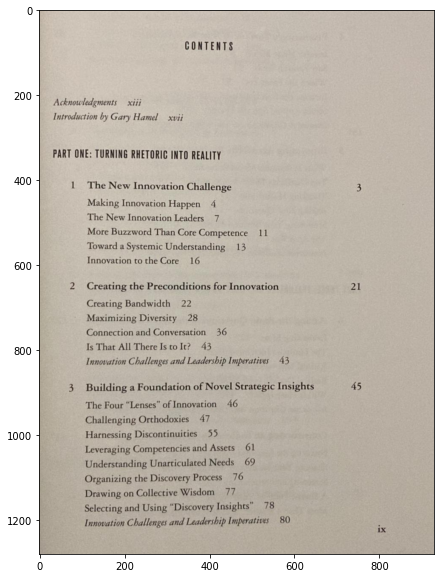

In [ ]:
imagem_exemplo = cv2.imread("exemplos/livro-ocr.jpeg")

imagem_exemplo = cv2.cvtColor(imagem_exemplo, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(imagem_exemplo)

Note que esta página de livro foi uma foto que eu tirei e mesmo sem nenhuma análise, o Tesseract foi capaz de extrair todo o seu conteúdo. O que indica que sua base e modelo de treinamento considerou em grande parte livros, por isso não é de se esperar um resultado diferente.

In [ ]:
extract = pytesseract.image_to_string(imagem_exemplo)
print(extract)

CONTENTS

Acknowledgments — xiii

Introduction by Gary Hamel xvii

PART ONE: TURNING RHETORIC INTO REALITY

1

The New Innoyation Challenge 3
Making Innovation Happen 4

The New Innovation Leaders 7

More Buzzword Than Core Competence 11

Toward a Systemic Understanding 13

Innovation to the Core 16

Creating the Preconditions for Innovation 21

Creating Bandwidth 22

Maximizing Diversity 28

Connection and Conversation 36

Is That All There Is to It? 43

Innovation Challenges and Leadership Imperatives 43

Building a Foundation of Novel Strategic Insights 45

The Four “Lenses” of Innovation 46
Challenging Orthodoxies 47

Harnessing Discontinuities 55

Leveraging Competencies and Assets 61
Understanding Unarticulated Needs 69
Organizing the Discovery Process 76

Drawing on Collective Wisdom 77

Selecting and Using “Discovery Insights” 78
Innovation Challenges and Leadership Imperatives 80



Este próximo exemplo é de outra página de um outro livro porém escrito em português.

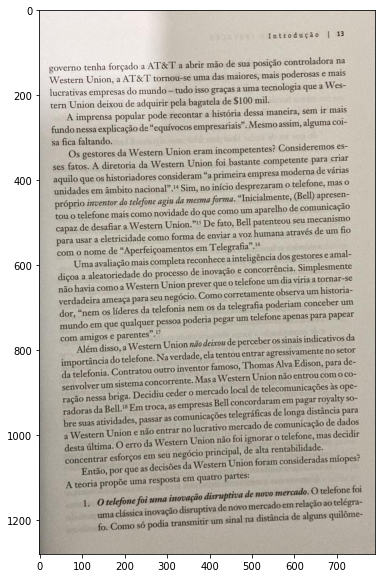

In [49]:
imagem_exemplo = cv2.imread("exemplos/livro-ocr-pt-br-inclinado.jpeg")

imagem_exemplo = cv2.cvtColor(imagem_exemplo, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(imagem_exemplo)

Por outro lado, quando analisarmos uma página de outro livro em português, o resultado foi um pouco diferente.

In [ ]:
extract = pytesseract.image_to_string(imagem_exemplo)
print(extract)

 

Introducgao | 13

governo tenha forgado a AT&T a abrir mio de sua posi¢a0 controladora na
Western Union, a AT&T tornou-se uma das maiores, mais poderosas € mais
lucrativas empresas do mundo — tudo isso gragas a uma tecnologia que a Wes-
tern Union deixou de adquirir pela bagatela de $100 mil.

A imprensa popular pode recontar a historia dessa maneira, sem ir mais
fundo nessa explicacao de “equivocos empresariais”. Mesmo assim, alguma coi-
sa fica faltando.

Os gestores da Western Union eram incompetentes? Consideremos es-
ses fatos. A diretoria da Western Union foi bastante competente para criar
aquilo que os historiadores consideram “a primeira empresa moderna de varias
unidades em ambito nacional”.!* Sim, no inicio desprezaram 0 telefone, mas 0
proprio inventor do telefone agiu da mesma forma. “Jpicialmente, (Bell) apresen-
tou o telefone mais como novidade do que como um aparelho de comunicagao
capaz de desafiar a Western Union.”!5 De fato, Bell patenteou seu mecanismo
para usar 

Isso se deve por conta do idioma do modelo utilizado. Os modelos de machine learning responsáveis por analisar o OCR são instalados separadamente. O padrão é o inglês.

> Já fizemos a instalação logo no início deste notebook. Para fins de consulta, a instalação é feito por aqui ```!sudo apt install tesseract-ocr-por```. Outras plataformas, consulte a documentação do Tesseract.

In [ ]:
extract = pytesseract.image_to_string(imagem_exemplo, lang="por")
print(extract)

 

introdução | 13

governo tenha forçado a AT&T a abrir mão de sua posição controladora na
Western Union, a AT&T tornou-se uma das maiores, mais poderosas e mais
lucrativas empresas do mundo — tudo isso graças a uma. tecnologia que a Wes-
tern Union deixou de adquirir pela bagatela de $100 mil.

A imprensa popular pode recontar a história dessa maneira, sem ir mais
fundo nessa explicação de “equívocos empresariais”. Mesmo assim, alguma coi-
sa fica faltando.

Os gestores da Western Union eram incompetentes? Consideremos es-
ses fatos. A diretoria da Western Union foi bastante competente para criar
aquilo que os historiadores consideram “a primeira empresa moderna de várias
unidades em âmbito nacional”. Sim, no início desprezaram o telefone, mas O
próprio inventor do telefone agiu da mesma forma. “Inicialmente, (Bell) apresen-
tou o telefone mais como novidade do que como um aparelho de comunicação
capaz de desafiar a Western Union.”!s De fato, Bell patenteou seu mecanismo
para usar à 

### Imagem inclinada (_skewed_)
Mesmo a página tendo uma leve inclinação não foi suficiente para prejudicar a análise. Mesmo assim podemos criar um algoritmo que ajusta questões como essa.

A função abaixo foi retirado deste [post](https://stackoverflow.com/questions/57964634/python-opencv-skew-correction-for-ocr) do StackOverflow. 

Neste caso o autor simplificou o problema de detecção para estimação de ângulo entre faixas de -5 e +5 graus, assim comparou as maiores pontuações de histograma para definir qual é o ângulo estimado. Quando há uma inclinação na imagem, ao rotacionarmos para o ângulo reto o valor dos pixels nos histogramas varia da mesma forma, quanto mais reto, mais pixels alinhados maior o valor do histograma naquela região. Quando inclinado é o contrário, mais distribuição e menos concentração.

O autor fez uma explicação sobre o método utilizado no [blog](https://avilpage.com/2016/11/detect-correct-skew-images-python.html) dele.


Também há uma outra referência para o mesmo problema neste outro [post](https://www.pyimagesearch.com/2017/02/20/text-skew-correction-opencv-python/) do Adrian Rosebrok. Este método não trouxe bons resultados para este tipo de trabalho, prefira a referência anterior.

In [62]:
from scipy.ndimage import interpolation as inter

def correct_skew(image, delta=1, limit=5):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2)
        return histogram, score

    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
              borderMode=cv2.BORDER_REPLICATE)

    return best_angle, rotated

Agora passamos a imagem para o ```correct_skew```. Esta a função retorna o ângulo de correção bem como a imagem corrigida. Note que para o nosso caso, o Tesseract obteve o mesmo texto com e sem a correção, o que indica que ainda com pequenas inclinações ainda é capaz de processar sem grandes problemas, ainda assim é indicado a correção pois melhora a performance do modelo.

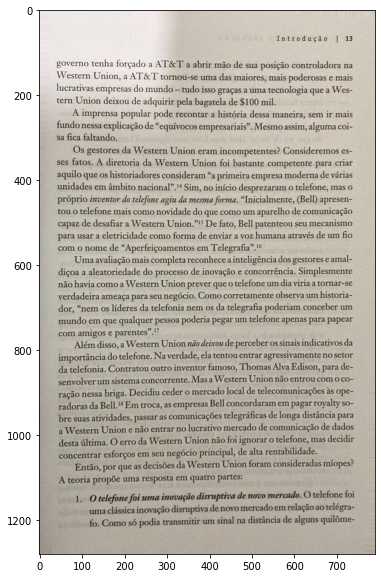

In [52]:
angle, rotated = correct_skew(imagem_exemplo)

plt.figure(figsize=(20,10))
plt.imshow(rotated)

In [53]:
extract = pytesseract.image_to_string(rotated, lang="por")
print(extract)

Introdução | 13

governo tenha forçado a AT&T a abrir mão de sua posição controladora na
Western Union, a AT&T tornou-se uma das maiores, mais poderosas e mais
lucrativas empresas do mundo — tudo isso graças a uma tecnologia que a Wes-
tern Union deixou de adquirir pela bagatela de $100 mil.

À imprensa popular pode recontar a história dessa maneira, sem ir mais
fundo nessa explicação de “equívocos empresariais”. Mesmo assim, alguma coi-
sa fica faltando.

Os gestores da Western Union eram incompetentes? Consideremos es-
ses fatos. A diretoria da Western Union foi bastante competente para criar
aquilo que os historiadores consideram “a primeira empresa moderna de várias
unidades em âmbito nacional”.!* Sim, no início desprezaram o telefone, mas o
próprio inventor do telefone agiu da mesma forma. “Inicialmente, (Bell) apresen-
tou o telefone mais como novidade do que como um aparelho de comunicação
capaz de desafiar a Western Union.”!s De fato, Bell patenteou seu mecanismo
para usar a el

## Analisando os cupons fiscais

Vamos agora focar nas imagens de recibos fiscais ou cupons fiscais, objeto principal deste laboratório.

Nosso estudo vai ser focado nestes 4 modelos de cupons fiscais. Distorções maiores do que este podem não serem suficientes para boas conversões, sendo estes podem ser considerados como o baseline do estudo.


(-0.5, 337.5, 449.5, -0.5)

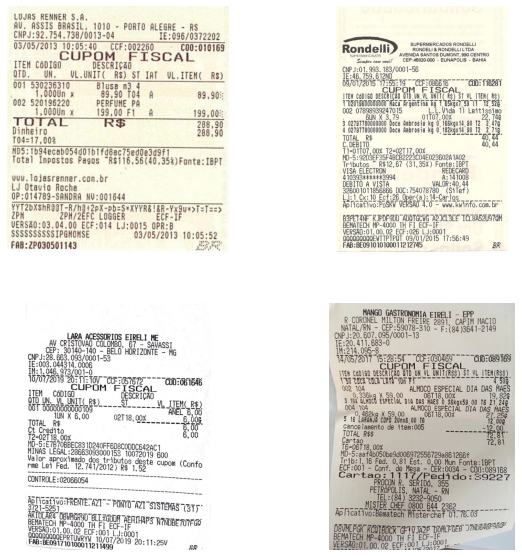

In [16]:
imagem_1 = cv2.imread("exemplos/cupom-fiscal-1.jpg")
imagem_1 = cv2.cvtColor(imagem_1, cv2.COLOR_BGR2RGB)



plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(imagem_1)
plt.axis("off")

imagem_2 = cv2.imread("exemplos/cupom-fiscal-2.jpg")
imagem_2 = cv2.cvtColor(imagem_2, cv2.COLOR_BGR2RGB)

plt.subplot(2,2,2)
plt.imshow(imagem_2)
plt.axis("off")

imagem_3 = cv2.imread("exemplos/cupom-fiscal-3.jpg")
imagem_3 = cv2.cvtColor(imagem_3, cv2.COLOR_BGR2RGB)

plt.subplot(2,2,3)
plt.imshow(imagem_3)
plt.axis("off")

imagem_4 = cv2.imread("exemplos/cupom-fiscal-4.jpg")
imagem_4 = cv2.cvtColor(imagem_4, cv2.COLOR_BGR2RGB)

plt.subplot(2,2,4)
plt.imshow(imagem_4)
plt.axis("off")

### Cupom fiscal 1

Cupom padrão, alinhado com fundo amarelo.

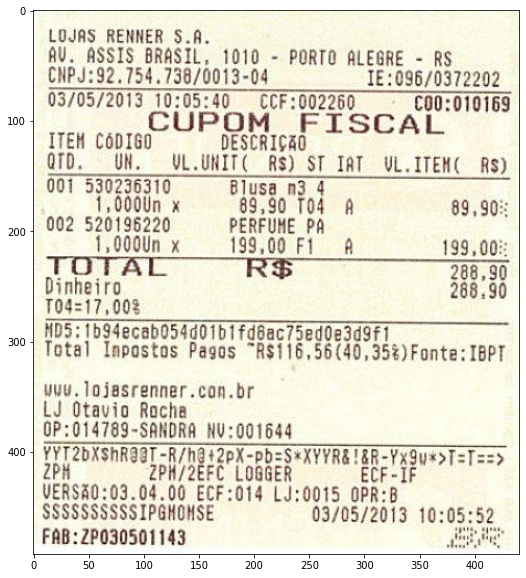

In [30]:
imagem_exemplo = cv2.imread("exemplos/cupom-fiscal-1.jpg")
imagem_exemplo = cv2.cvtColor(imagem_exemplo, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem_exemplo)

Vamos executar a imagem sem nenhum tratamento adicional, pois seu fundo não está tão ruim e o Tesseract está otimizado para lidar com situações parecidas como essa, ou seja, como fizemos nos exemplos anteriores.

In [32]:
extract = pytesseract.image_to_string(imagem_exemplo, lang="por")
print(extract)

LOJAS RENHER S.A.

AU. ASSIS BRASIL, 1010 - PORTO ALEGRE - AS

CNPJ:92.754.738/0013-04 1E:096/0372202

05/05/2013 10:05:40 CCF:002260) CO0:010169
CUPOM AL

ITEM CÓDIGO DESCRIÇÃO

QTD. UM. LM R$) ST IAT UL.ITENC R$)

001 530236310 Blusa n3 4 É
1,000Un x 89,90 TO4 A 89,90%:
002 520196220 PERFUME PA
1,000Un x 199,00 FI à 199,00:
TO” 288,90
Dinheiro 288,90
T04=17,00%

ND5: Ib34ecabO54dO bi fdôac75edOe3dIF1
Total Inpostos Pagos “R$116,56 (40,35%)Fonte: IBPT

uuu. po con.br

LJ Otavio Rochi

0P:014789-: SANDRA NU: 001644
VYT2DXSNROBT -R/hB420X-pb=SAXVYR&BR-VxSux>T=T==>
2Ph 2PN/2EFC LOGRER ECF-IF

VERSÃO: 03.04.00 ECF:014 LJ:0015 OPR:B
SSSSSSSSSS IPGHONSE 03/05/2013 10
FAB:ZP030501143

 



Para reduzir eventuais ruídos no fundo, podemos utilizar um pipeline simples composto por: 

1. Suavização da imagem
2. Limiarização

A limirização vai utilizar dos pixels suavizados das quais podem ter intensidade maior ou semelhante da informação, por isso que a atenuação geral média ainda que afete a informação, em menor número, é suficiente para atenuar também os ruídos.

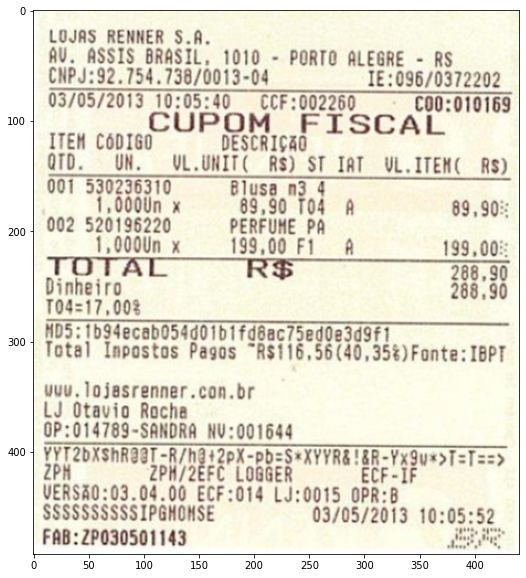

In [34]:
imagem_suav = cv2.blur(imagem_exemplo, (2,2))

plt.figure(figsize=(20,10))
plt.imshow(imagem_suav)


Uma boa técnica para remover estes ruídos é o que chamamos de limiarização. De tal forma que escolhemos uma intensidade mínima de pixels para prevalecer, o que for menor que o limitar será removido (valor igual a 0) e o que for maior ou igual será o máximo (definido como 255).

As imagens, por padrão, são definidas como pretas por terem intesidade de pixel igual a 0 ou totalmente brancas com intensidade de pixel igual a 255. Nesse caso, como temos uma imagem invertida, temos que utilizar valores elevados de limiar para ter o resultado esperado.

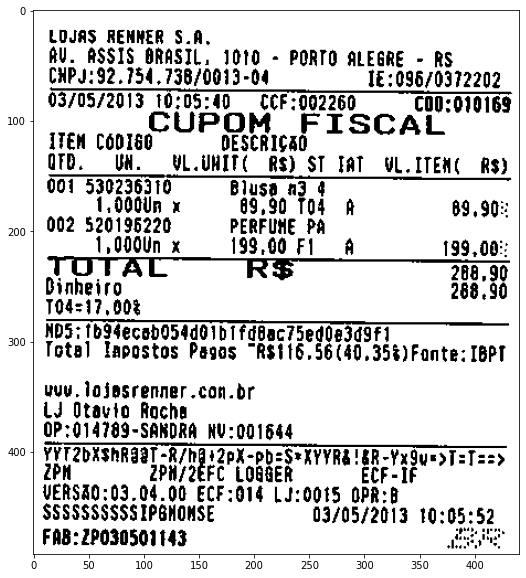

In [42]:
imagem_exemplo_gray = cv2.cvtColor(imagem_suav, cv2.COLOR_RGB2GRAY)
_, imagem_limiarizada = cv2.threshold(imagem_exemplo_gray, 190, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.imshow(imagem_limiarizada, cmap="gray")

In [43]:
extract = pytesseract.image_to_string(imagem_limiarizada, lang="por")
print(extract)

LDJAS RENNER S.A,

AU. ASSIS BRASIL, I010 - PORTO ALEGRE - RS

CHPJ:92.754,738/0013-04 1E:096/0372202

03/05/2013 10:05:40 — CcF:002260 C00:010169
CUPOM AL

ITEM CÓDIGO DESCRIÇA

FD. UM. UL.UNITO R$) ST FAT UL.ITENÇ R$)

001 530236310 Blusa n3 é

+000Un x 89,90 To4 À 89,903
002 520195220 PERFUNE PA
1,000Un x, 199.00 FI à 199,00:
TU 288.90
Dinheiro 288.90
T04=17,00%

NOS: 1b94ecabO54dO ID fdBac75edOBIdIF]
Total Inpostos Pesos "R$116.56(40,35$)Fante: IBPT

uuu. otesrenner. con.br
LJ Otavio
0P:014709-. ta NU: 001644

Topo PRShRaaT E Rad cYaduesT=T==>
VERSÃO: 03.04.00 ECF:O14 LJ:00E5 OPR: Be
SSSSSSSSSS IPBNONSE 03/05/2013 t0
FAB: 2030501143

 



Apesar de não ser o caso, também podemos utilizar as técnicas de erosão (imagens com fundo branco) ou dilatação (imagens com fundo preto) cujo o objetivo é incrementar os pixels adjacentes tornando mais espessos e logo mais com maior definição. Isso se aplica em imagens com alguma perda de informação nas etapas anteriores de eliminação de ruídos.

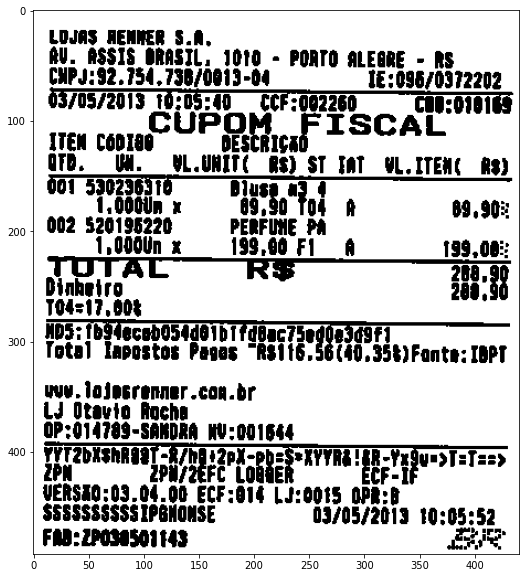

In [44]:
kernel = np.ones((2,2), np.uint8)
imagem_dilatacao = cv2.erode(imagem_limiarizada, kernel, iterations=1)

plt.figure(figsize=(20,10))
plt.imshow(imagem_dilatacao, cmap="gray")

In [45]:
extract = pytesseract.image_to_string(imagem_dilatacao, lang="por")
print(extract)

LOJAS RENHER S.A,

AU. ASSIS BRASIL. 1010 - PORTO ALEGRE - AS

CNPJ: 92. 254, 738/0013-04 1E:096/0372202
O EO ti SC Aq

ITEM cóDIGO F

QTD. UM.  UL.UNITC R$) ST FAT UL.ITENC R$)

01 53023631 Musa Pod .
«000UR x O Tos 89,90%
002 520195220 PERFUME PA

1,000Un x 199,00 FI A
Dinheiro
bOt

   
 

   

    
      

 

   

    
 

lecob054001bIfdBac75eddaIdIFT
Total aposto Pagos Ted (40,35t)Fonta: IBPT
uv, lojegrenner .con.br
LJ Otavio Rocha
0P:014209-SANDRA NV:001644
TWT2DKSNRTO] =R/h0420X-pb=SeRPYRG GR -YxdunsT=T==>
Do MORRE LORRER: TRE ARE
VERSAO:03.04.00 ECF:014 LJ:0015 OPR:E
$555S5SSSS IPGNONSE 03/05/2013 10:05:
FAB: ZPOSOSOITAS E

   
    

 



Conforme os casos anteriores observados, para esta imagem de cupom, a erosão não era necessário e acabou prejudicando o resultado final.

### Cupom fiscal 2

Cupom com fundo amarelo e logotipo da empresa.

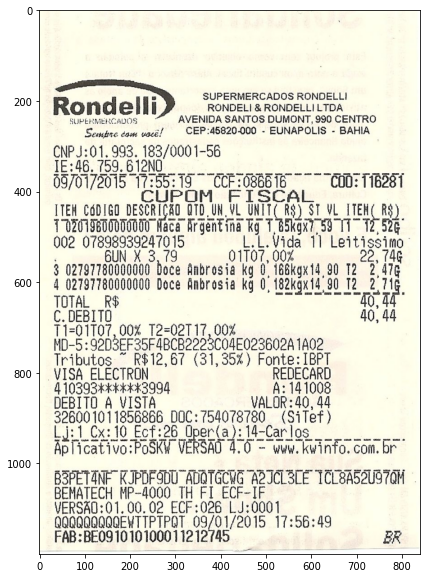

In [46]:
imagem_exemplo = cv2.imread("exemplos/cupom-fiscal-2.jpg")
imagem_exemplo = cv2.cvtColor(imagem_exemplo, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem_exemplo)

In [47]:
extract = pytesseract.image_to_string(imagem_exemplo, lang="por")
print(extract)

= SUPERMERCADOS RONDELLI

Rondelli RONDELI & RONDELLILTDA

SUPERMERCADOS AVENIDA SANTOS DUMONT, 990 CENTRO
Sempre com você! | CEP:45820-000 - EUNAPOLIS - BAHIA

CNP J:01. 993. 183/0001-56
1E:46. 159.61 ENO

FISCâL

HE cóDIco DESTRIE ão DTD UN VL UNTICRS) ST UL Em
TORONTEUONTUNNO faca Ergentma Rg T E5kgX),99 TT” T2,52
002 078989392470 15 L.L.Vida 11 Letesóimo

GUN X 3,7 01707,00% 02,1
3 02797780000000 Doce Anbrosia kg 0, , 1B6kgx 14,90 T2 7” di
4 02797780000000 Doce Anbrosia kg 0, 182kgx14/90 e da
TOTAL =
C. DEBI E mi
Tt- STO? 00% T2=02717,00%
MD-5: : OO DBEF 35FABCRO228COMEO23602A 1002
a R$12,67 (31,35%) ao E

ISA ELECTRON REDE

e h: TájO0

À VIS VALOR: 40, 44
SSB jo Edo DOC: FERRO (SiTef)

+

BEMATECH MP-4000 TH

VERSÃO: 01.00.02 ECF: :000]
QOOROQNAGENTTPTPOT a 17:56:49
FAB:BE0910 101000112 12745 ER



Aplicando aperfeiçoamentos.

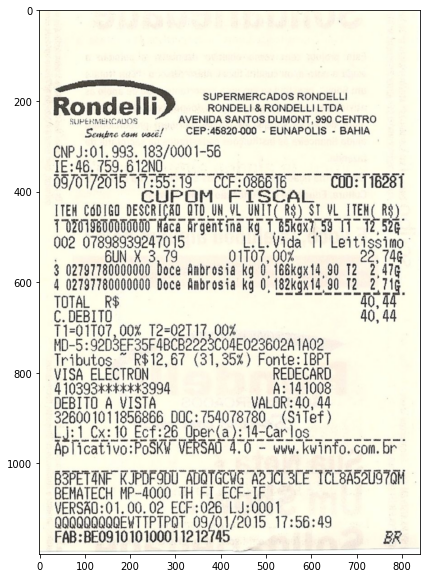

In [48]:
imagem_suav = cv2.blur(imagem_exemplo, (2,2))

plt.figure(figsize=(20,10))
plt.imshow(imagem_suav)

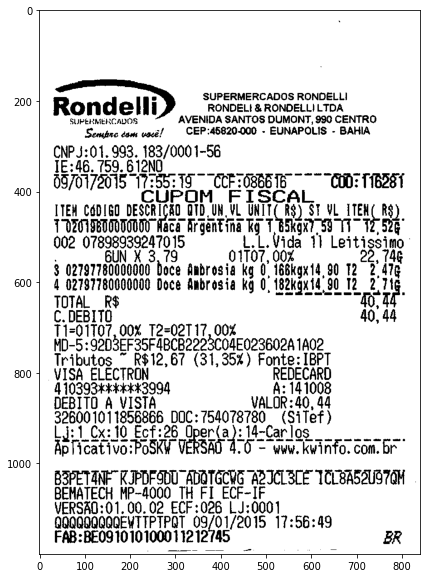

In [52]:
imagem_exemplo_gray = cv2.cvtColor(imagem_suav, cv2.COLOR_RGB2GRAY)
_, imagem_limiarizada = cv2.threshold(imagem_exemplo_gray, 190, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.imshow(imagem_limiarizada, cmap="gray")

In [54]:
extract = pytesseract.image_to_string(imagem_limiarizada, lang="por")
print(extract)

s SUPERMERCADOS RONDELL]
Ron d e ] | l RONDEL! & RONDELLILTDA
y : AVENIDA SANTOS DUMONT, 990 CENTRO

SUPERMERCADOS
Sempre com você! CEP:46820-000 - EUNAPOLIS - BAHIA

CNP 3:01. 993. 183/0001-56
1E:46. 759. 612N0  eacarne--=— -
09/01/0015 TE DE DME ÇÕES (SR CUD: TIBZBT

ITEM CáDIGO sá E UN.VL dia STYL a
TOZOISENONTÓNTO faca Argentma ui TRBMGXT, SS TT Tê, BZ
002 078989392470 15 Vida 7] Lettissio

BN X 37 otor. 00 5,706
5 02197780000000 Doce Anbrosia kg O. 1BBkgxi4, 90 12 2.476
4 02787780000000 Doce Anbresia ká 0. 182háx14,90 12 2! LI,
JOTA R$ 10,7

BITO 40, 44
E pi 107,00% T2=02T1
MD-5: OBOBEPSSEdBCBDS0BCOME02302A 1402
Jrabub tos ” R$12,67 (31,35%) Fonte: IBPT
REDECARD

Io AÊ M a

DEBITO À VISTA
boni pc: 754078780" Site)
| 0x:10 ERRA: slá-Carlos
Pe PESA SAU 4.0 — wyy. kyinTo. com. br

BSPETANE RR ADATGLRO RE JCTSDE TELEASASTAM
BEMATECH MP- a ODOR

VERSÃO: 01. 00. 02 EUF:O 0001
ANAROAAAGENTIPTPOT 09 fere 17:56:49
FAB:BE091010100011212 ER

,



### Cupom fiscal 3

Cupom com fundo branco (cópia) e levemente inclinado.

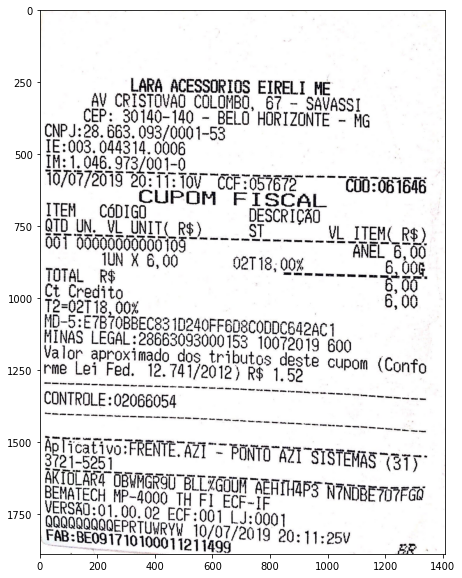

In [55]:
imagem_exemplo = cv2.imread("exemplos/cupom-fiscal-3.jpg")
imagem_exemplo = cv2.cvtColor(imagem_exemplo, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem_exemplo)

In [60]:
extract = pytesseract.image_to_string(imagem_exemplo, lang="por")
print(extract)

LARA ACESSORIOS EIRELI ME
AV CRISTOVÃO COLOMBO, 67 - SAVASSI
CEP: 30140-140 - BELO HORIZONTE — MG
CNPJ:28. 863. 093/0001-53
1E:003. 044314. 0006
1h: 1.046, 973/00 1-0

10/07/2019 20: Ti: TOU “CCETOS7E COO:06 1646
C F ISCâL

ITEM CÓDIGO DESCRIÇÃO

GD UN, VL UNIT R$) SI VL ITEMC R$)

0067 05000000000 103 ANEL 6,00
TUN X 6,00 02718,004 o  UOG

TOTAL R$ ,

Ct Credito . 6, 00

Te=02T18,00%

MD-5:E TB OBBECSS ID240FFEDECODDCEADAÇ 1
MINAS LEGAL :28683093000 153 10072079 600

alor aproximado dos tributos deste ,
rme Lei Fed. 12.741/2012) R$ 1.50 “POM (Conto

SRS OR CR e a ps io ia

p fia f E ! FREME, AZ — PONTO AZI SISTEMAS Gm

feia um, mom seo mim me,

MUUTLARO CENIGRUUELLZGUOA VERTIAPS RARE oro
BEMATECH HP-4000 TH FI ECR JEM APS NANLBETITF
Ra e o

4

ER.



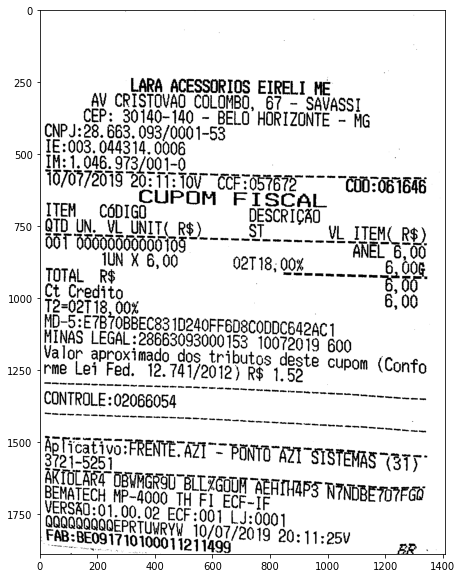

In [57]:
imagem_exemplo_gray = cv2.cvtColor(imagem_exemplo, cv2.COLOR_RGB2GRAY)
_, imagem_limiarizada = cv2.threshold(imagem_exemplo_gray, 190, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.imshow(imagem_limiarizada, cmap="gray")

In [58]:
extract = pytesseract.image_to_string(imagem_limiarizada, lang="por")
print(extract)

LARA ACESSORIOS EIRELI ME
AV CRISTOVAD COLOMBO, 67 - SAVASSI
CEP: 30140-140 - BELO HORIZONTE - MG
CNP J:28. 663. 093/0001-53
IE :003. 044314. 0006
IM: 1.046. 973/00]

-0 nana nn
10/07/2019 20: Ti: TOW CLETOBIET COD: 06 1646
CUP FISCAL

ITEM DESCRIÇÃO
OID UN. ML UNITC RS) o ST ML ITEMC R$)
007 00000000000 103 ANEL 6,00
TUN X 6,00 02TIB;00K o 6, 006
CE Crest 600
redIito
To=02

=02718,00%
MD-5:E7B fÓBBECSS ID240FFBDSCODDCAA2AC |
MINAS LEGAL :28683093000 153 10072079 600

alor aproximado dos tributos deste
rm Lei Fed. 12.741/2012) R$ 1.55 CUPOM (Confo

CTA e e e e a is ca e a e 2 e a as

cm mm qm nur me (MO e e a o a e e a e e o tm .
tm e gu ma ua cs rapa
VP e q is e e

ho feat vo: FRENTE. AZ1"= PONTO AZITSTSTEMAS “BIT

ARTULARA DEVAGRIO ELLA APR
BEMATECH PEDRO pa EV LAR AEAÍMIPS NINE TO
VERSAD: 01.00.02 EC.00

:01.00,0 :001 1J:000]
QOQRAQOAGEPRT 1:
FAB:BEOS17 101090 140 1407/2019 20: 11:254

ER.



Este cupom possui uma inclinação da qual podemos resolver utilizando a função ```correct_skew```.

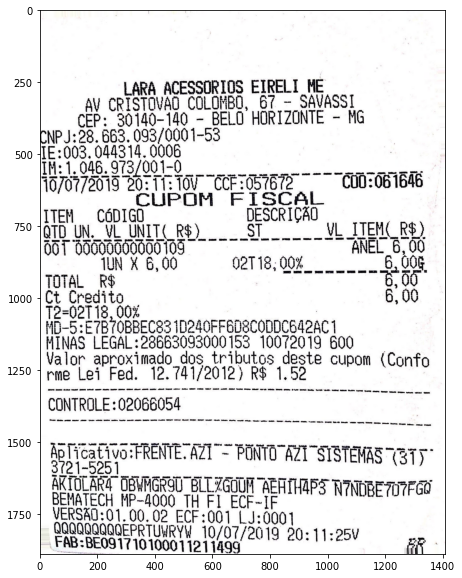

In [65]:
angulo, imagem_exemplo_ajustada = correct_skew(imagem_exemplo)

plt.figure(figsize=(20,10))
plt.imshow(imagem_exemplo_ajustada, cmap="gray")

In [67]:
angulo

2

In [68]:
extract = pytesseract.image_to_string(imagem_exemplo_ajustada, lang="por")
print(extract)

LARA ACESSORIOS EIRELI ME
AV CRISTOVAD COLOMBO, 67 - SAVASSI

CEP: 30140-140 - BELO HORIZONTE - MG
CNP J:28. 63. 093/0001-53
. 044314. 0006

OM

ITEM TGO ç
QTD UN. VL UNI R$) ST YL ITEM( R$)
007 00000000000 105 , L 6,00

UN X 6,00 02TIB;00K 6,005.
TOTAL R$ , 00
Ct Credito 6, OO
T2=02T1B

do; |
HO SETE POBBECSS ID2A0FFEDSCODDCEASAC 1
MINAS LEGAL -26665085000 165 "10072014 Goo
ator aproximado os LPbuUtos ESTE CU
O a IDO 12) RS 16D e CUPOM (Conto

CONTROLE : 02066054

E TCSNSTREMECAM = ONO RITA TT
O MRI . ONTO AZI SISTEMAS (37)
4 OBWMGROU BLLYZGOUM AER VAMBENDEC
BEMATECH PÊ-GODO TH FL BCE MS NAUBETITPGO
CEBOGROGEPR UR 10/07/20 194
FAB=BEO9 17 1010001121 404/2019 20:11:25V up



### Cupom fiscal 4

Cupom fiscal fundo branco com leve distorção (amassado).

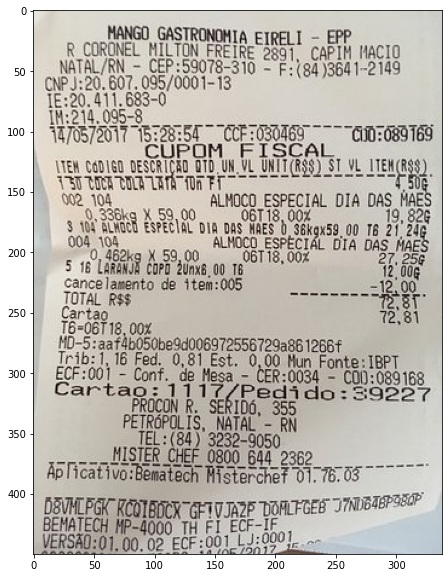

In [72]:
imagem_exemplo = cv2.imread("exemplos/cupom-fiscal-4.jpg")
imagem_exemplo = cv2.cvtColor(imagem_exemplo, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem_exemplo, cmap="gray")

In [73]:
extract = pytesseract.image_to_string(imagem_exemplo, lang="por")
print(extract)

É cor? ETA ele E capim uucio
NATAL/RN 310 = F:(84)3841-2149
aê E RA «88/0001 13

 

  

St 068 Ras
e E Ea E (ias GD: 0B9TES.
VEM CóDIGO eta MD UN VL UNIT(R$S) ST VL TERÇAS!
TATA E
2 qe Troco ESPECIAL DIA DAS HAE
sm A ET ES 1 Sion oo 18 21 26
067 Tê 00% Clio SE

E A ri ata oo 18
cancelamento de iteih:
aa Rs

 

  
 
     
 

FeCBêR e ope
HD-S: a bens nmaamajDaas
, 16 Fed. 0,81 Est. 0,00 Hun F

EF OO Bi pao
ech Misterche? 01:78.03
a
Efe o EEE

   
  



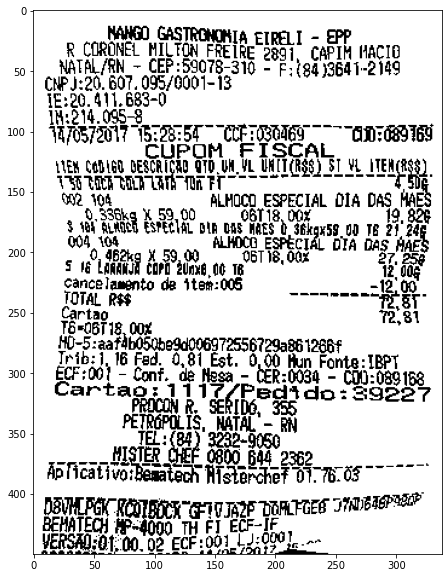

In [79]:
imagem_exemplo_gray = cv2.cvtColor(imagem_exemplo, cv2.COLOR_RGB2GRAY)
_, imagem_limiarizada = cv2.threshold(imagem_exemplo_gray, 160, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.imshow(imagem_limiarizada, cmap="gray")

In [80]:
extract = pytesseract.image_to_string(imagem_limiarizada, lang="por")
print(extract)

NANGO GASTRONONTA
R CORONEL MILTON Re E caEA HACIO
NATAL/RN - CEP:S9078-: a O = Filed )3641-2749
Ea 20. E op 000T- 18

Ns a quite UE GMsÓBTES
se con aeá Tão O a HTC) BL ata

voa cio SPECIAL DIA DAS ia
RES SR putas À Sta o Je di a
Ea

 

o” 00x
5 LA Cv é ne e dedo
Carcelasento de R08008 E
dota Res REST
-2,81

16 fad 0,81 Est. 0,00 Mm Ponto:
Canê, de Mega: LERDO O

Tocas cor

0-5 gatAbOSObeGa0OBaT25SB 2a 1288 por
a

tetra

 
 

CF +00] —
E tao: 111€/Ped
ar disso do

PETRÓPIS, MA RN

voc E Risliras? Di óg
SÓS DUATOEO DNDERa
JH FI nr do

001 L):06K

ão

  

Ena na

   



## Aborgem por API cloud pública

Dentre os provedores de cloud pública que mais se destacam em análises de documentos e visão computacional é a Microsoft em sua oferta de cloud Azure.

Vamos explorar 2 recursos para teste fim, o primeiro voltado a Visão Computacional com OCR e o segundo especializado em análise por formulários.

### Instalando bibliotecas de _Computer Vision_

O Azure disponibiliza biblitoecas que facilitam o acesso a suas APIs.

Depois de instalar, você vai precisar para cada serviço a URL de serviço e uma chave primária.

In [82]:
!pip install azure-cognitiveservices-vision-computervision

     |████████████████████████████████| 85 kB 2.5 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 


### Configurando os dados de acesso

As chaves apresentadas aqui já foram removidas, você precisa gerar uma sua própria (da sua conta no Azure, é gratuita para estudantes).

In [83]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

import os
region = "eastus"
key = "a849b3aad7214038a9e59cbb6b2cb746"

credentials = CognitiveServicesCredentials(key)
endpoint_url = "https://" + region + ".api.cognitive.microsoft.com/"
client = ComputerVisionClient(
    endpoint=endpoint_url,
    credentials=credentials
)

Um exemplo de descrição de marcos ou paisagens turísticas a partir de uma imagem.

Vamos ver a análise da imagem abaixo.

![](https://images.pexels.com/photos/338515/pexels-photo-338515.jpeg)

In [5]:
domain = "landmarks"
url = "https://images.pexels.com/photos/338515/pexels-photo-338515.jpeg"
language = "en"

analysis = client.analyze_image_by_domain(domain, url, language)

for landmark in analysis.result["landmarks"]:
    print(landmark["name"])
    print(landmark["confidence"])

Eiffel Tower
0.9742844700813293



## Análise OCR & Visão Computacional

Agora vamos analisar os cupons fiscais por Visão Computacional e OCR do Azure.


### Cupom fiscal 1

In [8]:
# Read the image file
image_stream = open("exemplos/cupom-fiscal-1.jpg", "rb")

# Use the Computer Vision service to find text in the image
read_results = client.recognize_printed_text_in_stream(image_stream,language="pt")

# Process the text line by line
for region in read_results.regions:
    for line in region.lines:

        # Read the words in the line of text
        line_text = ''
        for word in line.words:
            line_text += word.text + ' '
        print(line_text.rstrip())

LOJAS RENNER S.A.
Al. ASSIS BRASIL, 1010 - PORTO ALEGRE - RS
CNPJ:92.754.738/0013-04
IE : 095/0372202
03/05/2013
CCF : 002260
coo:010169
CUPOM FISCAL
ITEM CóDIGO
OID.
UN.
VL.UNIT( RS) ST VL.ITEH( R$)
001 530236310
1,000Un x
002 520196220
1,000Un x
Dinheiro
Blusa n3 4
89,90 T04
PERFUME PA
199,00 FI
199 ,
288,90
268,90
HD5: fd8ac75edOE3d9fl
Total Inpostos Pagos
uuu. lojasrenner. con.br
LJ Otauio Rocha
OP:014789-SRNDRA NU:001644
2PH
ZPH/2EFC LOGGER
ECF-IF
UERsn:03.04.OO ECF:014 LJ:0015 OPR:B
SSSSSSSSSSIPGHCHSE
03/05/2013
FAB:ZP030501143


### Cupom fiscal 2

In [84]:
# Read the image file
image_stream = open("exemplos/cupom-fiscal-2.jpg", "rb")

# Use the Computer Vision service to find text in the image
read_results = client.recognize_printed_text_in_stream(image_stream,language="pt")

# Process the text line by line
for region in read_results.regions:
    for line in region.lines:

        # Read the words in the line of text
        line_text = ''
        for word in line.words:
            line_text += word.text + ' '
        print(line_text.rstrip())

SUPERMERCADOS RONDELLI
Rondeili
RONDELI & RONDEI-Ll LTDA
AVENIDA SANTOS DUMONT, 990 CENTRO
SUPERMERCADOS}
CEP:45820-ooo - EUNAPOLIS - BAHIA
CNPJ:OI. 993. 183/0001-56
IE: 46.759.
CUPOM FISCAL
ITEM CóDlGO DESCRIUO UNIT( ST VL ITEM(
L. L. Vida ISI Leitissimo
002 07898939247015
22,
61JN X 3
3 02797780000000 boce kg O, T2 2
4 02797780000000 Doce kg 0 90 T2
TOTAL R$
C. DEBITO
Tl=OlT07 T2=02T17
40: 44
MD-5 : I
R$ 12, (31, 35%) Fonte:
Tributos
VISA ELECTRON
DEBITO A VISTA
REDECARD
A: 141008
VALOR : 40, 44
326001011856866 Düc:754078780 (Si Tef)
LJ: 1 cx: 10 Ecf:26 Pyer(aO: 14-Carlos _
Ãp 4.TZTwü.Twüfo. GOffl. 6r-
BEMATECH MP-4000 TH FI ECF-IF
VERSÃO:OI. 00.02 ECF:026 LJ:OOOI
09/01/2015
FAB:BE091010100011212745
BR


### Cupom fiscal 3

In [85]:
# Read the image file
image_stream = open("exemplos/cupom-fiscal-3.jpg", "rb")

# Use the Computer Vision service to find text in the image
read_results = client.recognize_printed_text_in_stream(image_stream,language="pt")

# Process the text line by line
for region in read_results.regions:
    for line in region.lines:

        # Read the words in the line of text
        line_text = ''
        for word in line.words:
            line_text += word.text + ' '
        print(line_text.rstrip())

LARA ACESSORIOS EIRELI ME
AV CRISTOVAO COLOMBO, 67 - SAVASSI
CEP: 30140-140 - BELO HORIZONTE - MG
CFJ: 28.663.093/0001-53
IE:003.
IM: l. 046.9731001-0
coo:061646
CUPOM FISCAL
DESCRIÇÃO
ITEM CÓDIGO
VL ITEMCR$-)
UN. VL UNIT( R$-)
ST
ION X 6,00
TOTAL R$
Ct Credito
T2=02T18
ANEL 6,-OO•
02T18,
MD-5 : I
MINAS LEGAL:28663093000153 10072019 600
Valor aproximado dos tributos deste cuporn (Confo
Lei Fed. 12.741/2012) R$ 1.52
CONTROLE :
(31 )
3h 1-5251
BEMATECH MP-4000 TH FI ECF-IF
VERSÃO:OI. 00.02 ECF:OOI LJ: 0001
10/07/2019 20: 11:25V


### Cupom fiscal 4

In [86]:
# Read the image file
image_stream = open("exemplos/cupom-fiscal-4.jpg", "rb")

# Use the Computer Vision service to find text in the image
read_results = client.recognize_printed_text_in_stream(image_stream,language="pt")

# Process the text line by line
for region in read_results.regions:
    for line in region.lines:

        # Read the words in the line of text
        line_text = ''
        for word in line.words:
            line_text += word.text + ' '
        print(line_text.rstrip())

MANGO GASTRON(HIA EIRELI - EPP
R CORONEL HILTON FREIRE CAPIM
NATAL/'RN - CEP :59078-310 -
CNPJ:20.ô01. 095/0001-13
IE:20.411.ô83-o
IM:214.ogs-8
CUPOM FISCAL
ALHOCO ESPECIAL DIA OAS
C 33Ek
06T18
82G
S oas h xsg 00 21 24
ALVOCO ESPÉCIkL OTA DAS
004
18,
cancelamento de tteh:005
TOTAL R$$
Cartao
27.
12.
-12 00
72,81
Trib:1 16 Fed. 0,81 Est. 0 00 Fonte:1BPT
ECF:ooi - conf. de Mesa - tER:0034 -
Cartao: 11 17/Pedi do : 39227
PROCON R. SERIÜó, 355
PETRÓPOLIS, NATAL - RN
3232-9050
MISTER CHEF 0800 2362
BEMATECH MP-4000 TH ECF-IF
00.02


## Análise por reconhecimento de formulários

O Azure possui outro serviço especializado em leitura e processamento de formulários e cupons como esse.

Ele vem carregado com domínios de cupons dos EUA e Canadá, mas mesmo assim possui bons resultados para os nossos deste estudo.

### Instalação de biblioteca _Form Recognizer_

In [87]:
!pip install azure_ai_formrecognizer

     |████████████████████████████████| 149 kB 5.3 MB/s 
     |████████████████████████████████| 177 kB 46.7 MB/s 


### Configurando os dados de acesso

In [88]:
import os
from azure.ai.formrecognizer import FormRecognizerClient
from azure.core.credentials import AzureKeyCredential

form_endpoint  = "https://handson-mba-fiap-form.cognitiveservices.azure.com/"
form_key = "c2c5af4795d94cf298ab682776000a56" 

form_recognizer_client = FormRecognizerClient(endpoint=endpoint_url, credential=AzureKeyCredential(form_key))


### Cupom fiscal 1

In [98]:
image_path = "exemplos/cupom-fiscal-1.jpg"

with open(image_path, "rb") as f:
    analyze_receipt = form_recognizer_client.begin_recognize_receipts(receipt=f)

receipt_data = analyze_receipt.result()
receipt_data

[RecognizedForm(form_type=prebuilt:receipt, fields={'Items': FormField(value_type=list, label_data=None, value_data=None, name=Items, value=[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=Blusa n3 4, bounding_box=[Point(x=176.0, y=152.0), Point(x=264.0, y=152.0), Point(x=264.0, y=169.0), Point(x=176.0, y=169.0)], field_elements=None), name=Name, value='Blusa n3 4', confidence=0.899), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=89,90, bounding_box=[Point(x=185.0, y=169.0), Point(x=229.0, y=168.0), Point(x=229.0, y=186.0), Point(x=185.0, y=185.0)], field_elements=None), name=Price, value=8990.0, confidence=0.931), 'Quantity': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=1,000Un, bounding_box=[Point(x=54.0, y=167.0), Point(x=117.0, y=168.0), Point(x=117.0, y=185.0), 

In [99]:
receipt = receipt_data[0]
receipt

RecognizedForm(form_type=prebuilt:receipt, fields={'Items': FormField(value_type=list, label_data=None, value_data=None, name=Items, value=[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=Blusa n3 4, bounding_box=[Point(x=176.0, y=152.0), Point(x=264.0, y=152.0), Point(x=264.0, y=169.0), Point(x=176.0, y=169.0)], field_elements=None), name=Name, value='Blusa n3 4', confidence=0.899), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=89,90, bounding_box=[Point(x=185.0, y=169.0), Point(x=229.0, y=168.0), Point(x=229.0, y=186.0), Point(x=185.0, y=185.0)], field_elements=None), name=Price, value=8990.0, confidence=0.931), 'Quantity': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=1,000Un, bounding_box=[Point(x=54.0, y=167.0), Point(x=117.0, y=168.0), Point(x=117.0, y=185.0), P

Campos reconhecidos por padrão. Apesar de haver bastante campo identificado ainda há a possibilidade de treinar um modelo específico para os cupons fiscais.

In [100]:
receipt.fields

{'Items': FormField(value_type=list, label_data=None, value_data=None, name=Items, value=[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=Blusa n3 4, bounding_box=[Point(x=176.0, y=152.0), Point(x=264.0, y=152.0), Point(x=264.0, y=169.0), Point(x=176.0, y=169.0)], field_elements=None), name=Name, value='Blusa n3 4', confidence=0.899), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=89,90, bounding_box=[Point(x=185.0, y=169.0), Point(x=229.0, y=168.0), Point(x=229.0, y=186.0), Point(x=185.0, y=185.0)], field_elements=None), name=Price, value=8990.0, confidence=0.931), 'Quantity': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=1,000Un, bounding_box=[Point(x=54.0, y=167.0), Point(x=117.0, y=168.0), Point(x=117.0, y=185.0), Point(x=54.0, y=185.0)], field_elements=None), name

Obtendo dados relevantes:

In [101]:
if receipt.fields.get("MerchantAddress").value is not None:
  print(receipt.fields.get("MerchantAddress").value)

if receipt.fields.get("MerchantName").value is not None:
  print(receipt.fields.get("MerchantName").value)

if receipt.fields.get("Total").value is not None:
  print(receipt.fields.get("Total").value)

if receipt.fields.get("Items").value is not None:
  print(receipt.fields.get("Items").value)

AV. ASSIS BRASIL, 1010 - PORTO ALEGRE - RS
LOJAS RENNER S.A.
28890.0
[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=Blusa n3 4, bounding_box=[Point(x=176.0, y=152.0), Point(x=264.0, y=152.0), Point(x=264.0, y=169.0), Point(x=176.0, y=169.0)], field_elements=None), name=Name, value='Blusa n3 4', confidence=0.899), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=89,90, bounding_box=[Point(x=185.0, y=169.0), Point(x=229.0, y=168.0), Point(x=229.0, y=186.0), Point(x=185.0, y=185.0)], field_elements=None), name=Price, value=8990.0, confidence=0.931), 'Quantity': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=1,000Un, bounding_box=[Point(x=54.0, y=167.0), Point(x=117.0, y=168.0), Point(x=117.0, y=185.0), Point(x=54.0, y=185.0)], field_elements=None), name=Quantity, value=100

In [126]:
for item in receipt.fields.get("Items").value:
  item_name = item.value.get("Name")
  print(item_name.value)

  item_price = item.value.get("Price")
  print(item_price.value)

Blusa n3 4
8990.0
PERFUME PA
19900.0


### Cupom fiscal 2

In [127]:
image_path = "exemplos/cupom-fiscal-2.jpg"

with open(image_path, "rb") as f:
    analyze_receipt = form_recognizer_client.begin_recognize_receipts(receipt=f)

receipt_data = analyze_receipt.result()
receipt_data

[RecognizedForm(form_type=prebuilt:receipt, fields={'Items': FormField(value_type=list, label_data=None, value_data=None, name=Items, value=[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=Maca Argentina Rg, bounding_box=[Point(x=253.0, y=455.0), Point(x=490.3, y=457.0), Point(x=490.0, y=496.5), Point(x=252.7, y=494.5)], field_elements=None), name=Name, value='Maca Argentina Rg', confidence=0.872), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=1,5kgx7,59, bounding_box=[Point(x=498.0, y=457.0), Point(x=651.0, y=457.0), Point(x=651.0, y=496.0), Point(x=498.0, y=496.0)], field_elements=None), name=Price, value=None, confidence=0.261), 'TotalPrice': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=12,52G, bounding_box=[Point(x=713.0, y=458.0), Point(x=799.0, y=458.0), Point(

In [128]:
receipt = receipt_data[0]
receipt

RecognizedForm(form_type=prebuilt:receipt, fields={'Items': FormField(value_type=list, label_data=None, value_data=None, name=Items, value=[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=Maca Argentina Rg, bounding_box=[Point(x=253.0, y=455.0), Point(x=490.3, y=457.0), Point(x=490.0, y=496.5), Point(x=252.7, y=494.5)], field_elements=None), name=Name, value='Maca Argentina Rg', confidence=0.872), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=1,5kgx7,59, bounding_box=[Point(x=498.0, y=457.0), Point(x=651.0, y=457.0), Point(x=651.0, y=496.0), Point(x=498.0, y=496.0)], field_elements=None), name=Price, value=None, confidence=0.261), 'TotalPrice': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=12,52G, bounding_box=[Point(x=713.0, y=458.0), Point(x=799.0, y=458.0), Point(x

In [129]:
if receipt.fields.get("MerchantAddress").value is not None:
  print(receipt.fields.get("MerchantAddress").value)

if receipt.fields.get("MerchantName").value is not None:
  print(receipt.fields.get("MerchantName").value)

if receipt.fields.get("Total").value is not None:
  print(receipt.fields.get("Total").value)

if receipt.fields.get("Items").value is not None:
  print(receipt.fields.get("Items").value)

AVENIDA SANTOS DUMONT, 990 CENTRO - EUNAPOLIS - BAHIA
RONDELI & RONDELLI LTDA
4044.0
[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=Maca Argentina Rg, bounding_box=[Point(x=253.0, y=455.0), Point(x=490.3, y=457.0), Point(x=490.0, y=496.5), Point(x=252.7, y=494.5)], field_elements=None), name=Name, value='Maca Argentina Rg', confidence=0.872), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=1,5kgx7,59, bounding_box=[Point(x=498.0, y=457.0), Point(x=651.0, y=457.0), Point(x=651.0, y=496.0), Point(x=498.0, y=496.0)], field_elements=None), name=Price, value=None, confidence=0.261), 'TotalPrice': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=12,52G, bounding_box=[Point(x=713.0, y=458.0), Point(x=799.0, y=458.0), Point(x=798.0, y=495.0), Point(x=713.0, y=496.0)], field_elem

In [132]:
for item in receipt.fields.get("Items").value:
  item_name = item.value.get("Name")
  print(item_name.value)

  item_price = item.value.get("Price")
  print(item_price.value)

  item_price = item.value.get("TotalPrice")
  print(item_price.value)

Maca Argentina Rg
None
1252.0
L. L. Vida 11 Leitissimo
379.0
2274.0
Doce Ambrosia kg
None
247.0
Doce Ambrosia kg
None
271.0


### Cupom fiscal 3

In [134]:
image_path = "exemplos/cupom-fiscal-3.jpg"

with open(image_path, "rb") as f:
    analyze_receipt = form_recognizer_client.begin_recognize_receipts(receipt=f)

receipt_data = analyze_receipt.result()
receipt_data

[RecognizedForm(form_type=prebuilt:receipt, fields={'Items': FormField(value_type=list, label_data=None, value_data=None, name=Items, value=[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=ANEL, bounding_box=[Point(x=1078.0, y=801.0), Point(x=1196.0, y=803.0), Point(x=1195.0, y=865.0), Point(x=1078.0, y=863.0)], field_elements=None), name=Name, value='ANEL', confidence=0.412), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=6,00, bounding_box=[Point(x=362.0, y=842.0), Point(x=481.0, y=846.0), Point(x=478.0, y=900.0), Point(x=360.0, y=896.0)], field_elements=None), name=Price, value=600.0, confidence=0.912), 'Quantity': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=1UN, bounding_box=[Point(x=211.0, y=838.0), Point(x=286.0, y=840.0), Point(x=285.0, y=894.0), Point(x=210.0

In [135]:
receipt = receipt_data[0]
receipt

RecognizedForm(form_type=prebuilt:receipt, fields={'Items': FormField(value_type=list, label_data=None, value_data=None, name=Items, value=[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=ANEL, bounding_box=[Point(x=1078.0, y=801.0), Point(x=1196.0, y=803.0), Point(x=1195.0, y=865.0), Point(x=1078.0, y=863.0)], field_elements=None), name=Name, value='ANEL', confidence=0.412), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=6,00, bounding_box=[Point(x=362.0, y=842.0), Point(x=481.0, y=846.0), Point(x=478.0, y=900.0), Point(x=360.0, y=896.0)], field_elements=None), name=Price, value=600.0, confidence=0.912), 'Quantity': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=1UN, bounding_box=[Point(x=211.0, y=838.0), Point(x=286.0, y=840.0), Point(x=285.0, y=894.0), Point(x=210.0,

In [136]:
if receipt.fields.get("MerchantAddress").value is not None:
  print(receipt.fields.get("MerchantAddress").value)

if receipt.fields.get("MerchantName").value is not None:
  print(receipt.fields.get("MerchantName").value)

if receipt.fields.get("Total").value is not None:
  print(receipt.fields.get("Total").value)

if receipt.fields.get("Items").value is not None:
  print(receipt.fields.get("Items").value)

AV CRISTOVAO COLOMBO, 67 - SAVASSI
LARA
600.0
[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=ANEL, bounding_box=[Point(x=1078.0, y=801.0), Point(x=1196.0, y=803.0), Point(x=1195.0, y=865.0), Point(x=1078.0, y=863.0)], field_elements=None), name=Name, value='ANEL', confidence=0.412), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=6,00, bounding_box=[Point(x=362.0, y=842.0), Point(x=481.0, y=846.0), Point(x=478.0, y=900.0), Point(x=360.0, y=896.0)], field_elements=None), name=Price, value=600.0, confidence=0.912), 'Quantity': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=1UN, bounding_box=[Point(x=211.0, y=838.0), Point(x=286.0, y=840.0), Point(x=285.0, y=894.0), Point(x=210.0, y=891.0)], field_elements=None), name=Quantity, value=1.0, confidence=0.899), 'TotalPrice': 

In [137]:
for item in receipt.fields.get("Items").value:
  item_name = item.value.get("Name")
  print(item_name.value)

  item_price = item.value.get("Price")
  print(item_price.value)

  item_price = item.value.get("TotalPrice")
  print(item_price.value)

ANEL
600.0
600.0


### Cupom fiscal 4

In [138]:
image_path = "exemplos/cupom-fiscal-4.jpg"

with open(image_path, "rb") as f:
    analyze_receipt = form_recognizer_client.begin_recognize_receipts(receipt=f)

receipt_data = analyze_receipt.result()
receipt_data

[RecognizedForm(form_type=prebuilt:receipt, fields={'Items': FormField(value_type=list, label_data=None, value_data=None, name=Items, value=[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=COCA COLA LATA 100 FT, bounding_box=[Point(x=42.0, y=135.0), Point(x=158.0, y=135.0), Point(x=158.0, y=151.0), Point(x=42.0, y=151.0)], field_elements=None), name=Name, value='COCA COLA LATA 100 FT', confidence=0.781), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=59,00, bounding_box=[Point(x=102.0, y=162.0), Point(x=134.0, y=162.0), Point(x=134.0, y=175.0), Point(x=102.0, y=175.0)], field_elements=None), name=Price, value=5900.0, confidence=0.914), 'Quantity': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=0,336kg, bounding_box=[Point(x=41.0, y=163.0), Point(x=85.0, y=163.0), Point(

In [139]:
receipt = receipt_data[0]
receipt

RecognizedForm(form_type=prebuilt:receipt, fields={'Items': FormField(value_type=list, label_data=None, value_data=None, name=Items, value=[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=COCA COLA LATA 100 FT, bounding_box=[Point(x=42.0, y=135.0), Point(x=158.0, y=135.0), Point(x=158.0, y=151.0), Point(x=42.0, y=151.0)], field_elements=None), name=Name, value='COCA COLA LATA 100 FT', confidence=0.781), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=59,00, bounding_box=[Point(x=102.0, y=162.0), Point(x=134.0, y=162.0), Point(x=134.0, y=175.0), Point(x=102.0, y=175.0)], field_elements=None), name=Price, value=5900.0, confidence=0.914), 'Quantity': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=0,336kg, bounding_box=[Point(x=41.0, y=163.0), Point(x=85.0, y=163.0), Point(x

In [140]:
if receipt.fields.get("MerchantAddress").value is not None:
  print(receipt.fields.get("MerchantAddress").value)

if receipt.fields.get("MerchantName").value is not None:
  print(receipt.fields.get("MerchantName").value)

if receipt.fields.get("Total").value is not None:
  print(receipt.fields.get("Total").value)

if receipt.fields.get("Items").value is not None:
  print(receipt.fields.get("Items").value)

R CORONEL MILTON FREIRE 2891, CAPIM MACIO
MANGO GASTRONOMIA
72.81
[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=COCA COLA LATA 100 FT, bounding_box=[Point(x=42.0, y=135.0), Point(x=158.0, y=135.0), Point(x=158.0, y=151.0), Point(x=42.0, y=151.0)], field_elements=None), name=Name, value='COCA COLA LATA 100 FT', confidence=0.781), 'Price': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=59,00, bounding_box=[Point(x=102.0, y=162.0), Point(x=134.0, y=162.0), Point(x=134.0, y=175.0), Point(x=102.0, y=175.0)], field_elements=None), name=Price, value=5900.0, confidence=0.914), 'Quantity': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=0,336kg, bounding_box=[Point(x=41.0, y=163.0), Point(x=85.0, y=163.0), Point(x=85.0, y=175.0), Point(x=42.0, y=175.0)], field_elements=None), name=Quan

In [145]:
for item in receipt.fields.get("Items").value:
  item_name = item.value.get("Name")
  if item_name:
    print(item_name.value)

  item_price = item.value.get("Price")
  if item_price:
     print(item_price.value)

  item_total_price = item.value.get("TotalPrice")
  if item_total_price:
    print(item_total_price.value)

COCA COLA LATA 100 FT
5900.0
1982.0
ALMOCO ESPECIAL DIA DAS MAES 0 36kgx59 00 T6
5900.0
2124.0
LARANJA COPO 2Unx6,00 T6
12.0
